In [1]:
#import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
import seaborn as sns
#import the file from github to a dataframe
url = "https://raw.githubusercontent.com/Bropell/Asthma_Analysis_in_California_Counties/main/Databases/Merged_Datasets.csv"
ap_df = pd.read_csv(url)

ap_df = ap_df.set_index("County")

In [2]:
#column names
ap_df.columns

Index(['Pollutant: 1,3-butadiene', 'Pollutant: Acetaldehyde',
       'Pollutant: Benzene', 'Pollutant: Carbon tetrachloride',
       'Pollutant: Formaldehyde', 'Target', 'TotalPop', 'Income',
       'IncomePerCap', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment', 'Hispanic (%)', 'White (%)', 'Black (%)', 'Native (%)',
       'Asian (%)', 'Pacific (%)', 'Max_Voltage', 'Total EV Chargers',
       'Private EV Chargers', 'Public EV Chargers', 'AcresBurned',
       'Registered EV Count'],
      dtype='object')

In [3]:
ap_df['Target'].replace({0: "t", 1: "f"}, inplace=True)

In [4]:
# Create our features
X = pd.get_dummies(ap_df)
X = X.drop(columns=["Target_t","Target_f"])

# Create our target
y = pd.get_dummies(ap_df)
y = y["Target_t"]


In [5]:
#train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# fit the model and create prediction array
from imblearn.ensemble import BalancedRandomForestClassifier
brfc = BalancedRandomForestClassifier(random_state=1)
brfc = brfc.fit(X_train,y_train)
predictions = brfc.predict(X_test)
predictions

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=uint8)

In [7]:
# Balanced Accuracy Score 
y_pred = predictions
print("Balanced Accuracy Score")
balanced_accuracy_score(y_test, y_pred)

Balanced Accuracy Score


0.5277777777777778

In [8]:
# Confusion Matrix
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)

Confusion Matrix


array([[3, 3],
       [4, 5]])

In [9]:
# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.43      0.50      0.56      0.46      0.53      0.28         6
          1       0.62      0.56      0.50      0.59      0.53      0.28         9

avg / total       0.55      0.53      0.52      0.54      0.53      0.28        15



In [10]:
# Calculate the feature importance
importances = brfc.feature_importances_
importances

array([0.02220946, 0.04471767, 0.03605952, 0.        , 0.02064052,
       0.01639161, 0.01531993, 0.02095324, 0.01537983, 0.0202457 ,
       0.02148438, 0.01277398, 0.013111  , 0.02515432, 0.01523546,
       0.00612999, 0.01114506, 0.08123841, 0.02071418, 0.03079705,
       0.03056157, 0.00804206, 0.01609592, 0.01565623, 0.02059447,
       0.01940978, 0.01830685, 0.01518247, 0.04189657, 0.02698042,
       0.07367619, 0.0346291 , 0.01772029, 0.04273447, 0.04065113,
       0.03647358, 0.01453115, 0.01992483, 0.03613912, 0.02109248])

In [13]:
# Sort features by their importance
features_rank = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)

In [14]:
# Turn importance of features into a dataframe
features_df = pd.DataFrame(features_rank)
cols = ['Importance', 'Feature']
features_df.columns = cols
features_df

,Importance,Feature
0,0.081238,Transit
1,0.073676,Black (%)
2,0.044718,Pollutant: Acetaldehyde
3,0.042734,Pacific (%)
4,0.041897,Hispanic (%)
5,0.040651,Max_Voltage
6,0.036474,Total EV Chargers
7,0.036139,AcresBurned
8,0.036060,Pollutant: Benzene
9,0.034629,Native (%)


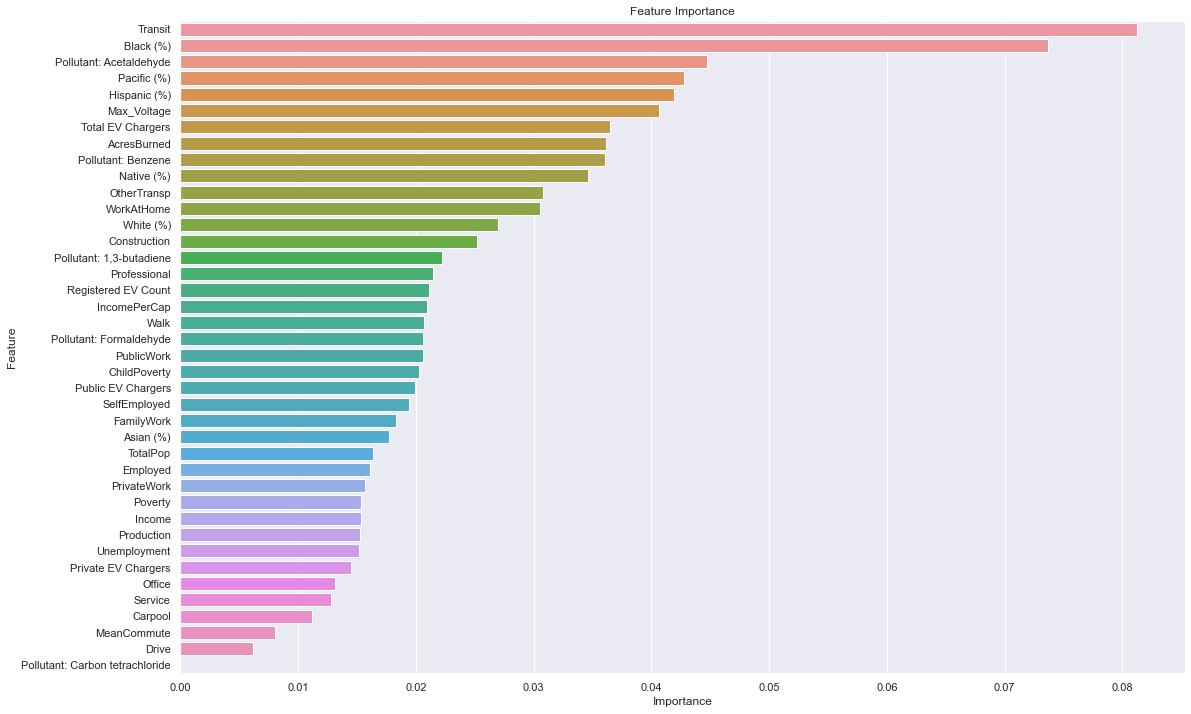

In [20]:
# Create visualization of feature importance
chart = sns.barplot(data=features_df, x="Importance", y="Feature", orient='h').set(title='Feature Importance')
sns.set(rc={'figure.figsize':(20,10)})